In [1]:
import pandas as pd
import requests
import lxml.html
import jupyterthemes as jt
import pylab


%matplotlib inline
jt.jtplot.style('onedork')

In [2]:
url = 'https://www.bundestag.de/parlament/wahlen/ergebnisse_seit1949/244692'

In [3]:
html = lxml.html.document_fromstring(requests.get(url).text)

table = html.find('.//table[@class="table bt-table-data"]')
parties = [th.text for th in table.findall('thead/tr/th/p')[1:-1]]

In [4]:
def float_or_none(f):
    try:
        return float(f.replace(',','.'))
    except:
        return None

In [5]:
dd = {}

for tr in table.findall('tbody/tr'):
    th = tr.findall('th')[0]
    year = int(th.text_content())
    #print(year, [p.text for p in tr.findall('td/p')[:-1]])
    dd[year] = [float_or_none(p.text) for p in tr.findall('td/p')[:-1]]
    
df = pd.DataFrame().from_dict(dd).T
df.columns = parties

In [6]:
df

,CDU/CSU,SPD,FDP,Die Grünen,Bündnis 90/Die Grünen,Die Linke. PDS,AfD
2017,32.9,20.5,10.7,NaN,8.9,9.2,12.6
2013,41.5,25.7,4.8,NaN,8.4,8.6,NaN
2009,33.8,23.0,14.6,NaN,10.7,11.9,NaN
2005,35.2,34.2,9.8,NaN,8.1,8.7,NaN
2002,38.5,38.5,7.4,NaN,8.6,4.0,NaN
1998,35.2,40.9,6.2,NaN,6.7,5.1,NaN
1994,41.5,36.4,6.9,NaN,7.3,4.4,NaN
1990,43.8,33.5,11.0,3.8,1.2,2.4,NaN
1987,44.3,37.0,9.1,8.3,NaN,NaN,NaN
1983,48.8,38.2,7.0,5.6,NaN,NaN,NaN


In [7]:
df['AfD'][2013] = 4.7

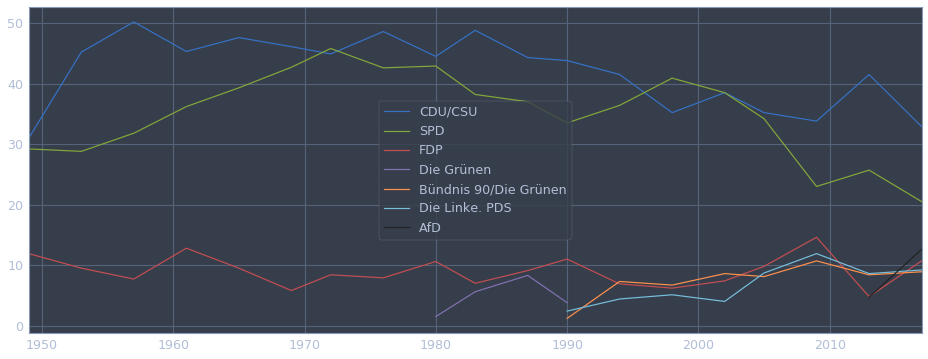

In [8]:
df.plot(figsize=(16,6))

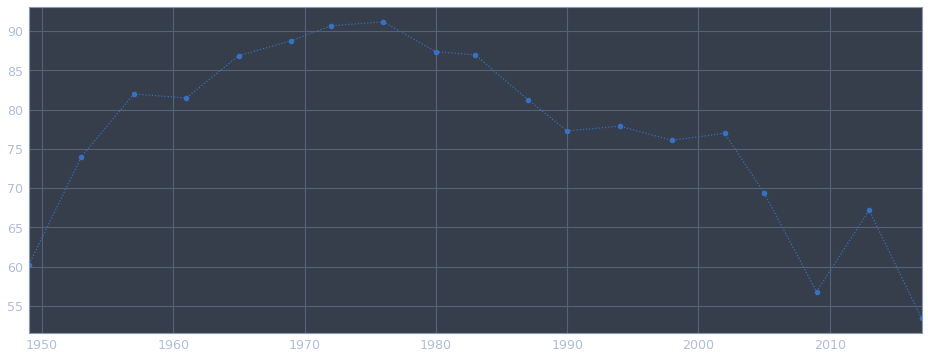

In [9]:
(df['SPD']+df['CDU/CSU']).plot(style=':o', figsize=(16,6))